# MI PRIMER TRAIN-TEST-PREDICT

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: BEGINNER**

Vamos a realizar nuestro primer train-test-predict. Para ello, utilizaremos datos meteorologicos de la ciudad de Madrid para hacer un modelo predictivo de PRECIPITACIONES a D+1.

# Librerias

In [1]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab

pd.set_option('display.max_columns',None)   # para visualizar mas columnas en un df

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Load dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Master Data Science/05_Machine Learning_Supervisado/Notebooks/ML1 - Mi primer modelo/ML1-weather_traintest.csv',index_col=0)

In [5]:
df.shape

(6812, 27)

In [6]:
df.head()

,fecha,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,NaN,0.0,6.0,W,1,1,0,0,0
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,NaN,0.0,7.0,N,0,1,0,0,0


In [7]:
df.fecha.min(), df.fecha.max()

('1997-01-01', '2015-12-31')

Tenemos un historico de 1997 hasta 2015 de todo el parte meteorologico diario. Como queremos construir un modelo capaz de predecir si llueve al dia siguiente (D+1), utilizaremos la funcion **shift()** para desplazar 1 fila (=1 dia) cada valor de 'ind_lluvia' en el dataset.

In [8]:
df.set_index('fecha', inplace=True)

In [9]:
df.sort_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6812 entries, 1997-01-01 to 2015-12-31
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperatura_max   6810 non-null   float64
 1   temperatura_med   6809 non-null   float64
 2   temperatura_min   6810 non-null   float64
 3   rocio_max         6810 non-null   float64
 4   rocio_med         6810 non-null   float64
 5   rocio_min         6810 non-null   float64
 6   humedad_max       6810 non-null   float64
 7   humedad_med       6810 non-null   float64
 8   humedad_min       6810 non-null   float64
 9   presion_max       6812 non-null   int64  
 10  presion_med       6812 non-null   int64  
 11  presion_min       6812 non-null   int64  
 12  visibilidad_max   5872 non-null   float64
 13  visibilidad_med   5872 non-null   float64
 14  visibilidad_min   5872 non-null   float64
 15  viento_max        6812 non-null   int64  
 16  viento_med        6812 non-null 

In [13]:
df['ind_lluvia']

fecha
1997-01-01    0
1997-01-02    1
1997-01-03    1
1997-01-04    0
1997-01-05    0
             ..
2015-12-27    0
2015-12-28    1
2015-12-29    1
2015-12-30    0
2015-12-31    1
Name: ind_lluvia, Length: 6812, dtype: int64

In [14]:
df['ind_lluvia'].shift(-1)

fecha
1997-01-01    1.0
1997-01-02    1.0
1997-01-03    0.0
1997-01-04    0.0
1997-01-05    0.0
             ... 
2015-12-27    1.0
2015-12-28    1.0
2015-12-29    0.0
2015-12-30    1.0
2015-12-31    NaN
Name: ind_lluvia, Length: 6812, dtype: float64

In [15]:
df['lluvia_D+1'] = df['ind_lluvia'].shift(-1)

In [24]:
df.head()

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,viento_dir,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,lluvia_D+1
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,NaN,0.0,6.0,SW,0,0,0,0,0,1.0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,SE,1,0,0,0,0,1.0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.0,6.0,W,1,1,0,0,0,0.0
1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,1010,1005,10.0,10.0,10.0,27,19,40.0,0.0,2.0,W,0,0,0,0,0,0.0
1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,1008,1005,10.0,5.0,1.0,14,6,40.0,0.0,7.0,N,0,1,0,0,0,0.0


# ML Preprocessing (express)

* Pulimos nulos y categóricos (type object), lo minimo para poder modelizar. 
* **IMPORTANTE:** Obviaremos la parte de analisis exhaustivo de los datos (EDA), corrección de formatos, gestión de altas correlaciones y bajas varianzas para no demorarnos en el preprocessing pero son steps que se deben realizar para garantizar las condiciones óptimas en el entrenamiento.

## Eliminar duplicados

In [17]:
# Check duplicados
len(df.index.unique())==len(df.index)

True

## Imputar nulos

In [23]:
df.isna().sum() 

temperatura_max     0
temperatura_med     0
temperatura_min     0
rocio_max           0
rocio_med           0
rocio_min           0
humedad_max         0
humedad_med         0
humedad_min         0
presion_max         0
presion_med         0
presion_min         0
visibilidad_max     0
visibilidad_med     0
visibilidad_min     0
viento_max          0
viento_med          0
racha_viento_max    1
precipitacion       0
nubes               0
viento_dir          0
ind_lluvia          0
ind_nieve           0
ind_truenos         0
ind_niebla          0
ind_granizo         0
lluvia_D+1          0
dtype: int64

In [18]:
# Eliminamos filas sin TARGET informado (seria contraproducente imputar valores al target del que queremos aprender!)
df.dropna(axis=0, subset=['lluvia_D+1'], inplace=True)

In [19]:
# Parece que hay 3 registros sin la temperatura ni la humedad informada, como son MUY POCOS registros optamos por eliminarlos en lugar de imputar un valor (que dios nos perdone!)
df.dropna(axis=0, subset=['temperatura_med'], inplace=True)

In [21]:
# imputamos la media de cada columna en los nulos restantes
cols_null = list(df.columns[df.isna().sum() >0])
cols_null

['visibilidad_max',
 'visibilidad_med',
 'visibilidad_min',
 'racha_viento_max',
 'nubes']

In [ ]:
# Nos interesa el ffill porque te coge el día 

In [25]:
for col in cols_null:
  df[col] = df[col].fillna(method='ffill')

In [26]:
print('Total nulos:',df.isna().sum().sum() )

Total nulos: 1


In [27]:
for col in cols_null:
  df[col] = df[col].fillna(method='bfill')

In [28]:
print('Total nulos:',df.isna().sum().sum() )

Total nulos: 0


## Encoding categoricos

Para encodear categoricos 2  opciones:
* One-Hot-Encoding
* Ordinal Encoding (si tiene un sentido ordinal), bajo, mediano, alto, sentido ordinal
Sentido cardinal, sentido categórico, el código postal por ejemplo porque no tiene un sentido numérico.
Para un Encoding Ordinal, és más útil tener un ranking, tiene más sentido que 1 y 0.

In [31]:
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['viento_dir']


In [29]:
df['viento_dir'].value_counts()

N     1964
SW    1133
W      978
NE     809
NW     731
S      605
SE     326
E      262
Name: viento_dir, dtype: int64

In [32]:
# One Hot Encoding
df = pd.get_dummies(df, columns=categories)

In [33]:
categories = list(df.select_dtypes(include='object').columns)
print('Total categoricas:', len(categories))

Total categoricas: 0


In [34]:
df.head(3)

,temperatura_max,temperatura_med,temperatura_min,rocio_max,rocio_med,rocio_min,humedad_max,humedad_med,humedad_min,presion_max,presion_med,presion_min,visibilidad_max,visibilidad_med,visibilidad_min,viento_max,viento_med,racha_viento_max,precipitacion,nubes,ind_lluvia,ind_nieve,ind_truenos,ind_niebla,ind_granizo,lluvia_D+1,viento_dir_E,viento_dir_N,viento_dir_NE,viento_dir_NW,viento_dir_S,viento_dir_SE,viento_dir_SW,viento_dir_W
fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,1008,1004,10.0,9.0,4.0,13,6,47.0,0.0,6.0,0,0,0,0,0,1.0,0,0,0,0,0,0,1,0
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,1003,997,10.0,9.0,4.0,26,8,47.0,0.0,5.0,1,0,0,0,0,1.0,0,0,0,0,0,1,0,0
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,999,996,10.0,10.0,7.0,27,19,47.0,0.0,6.0,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1


# MODELO

Ya tenemos los datos limpios (*clean data*) para poder modelizar. Vamos ahora a practicar un flujo simple de **TRAIN-TEST-PREDICT**:

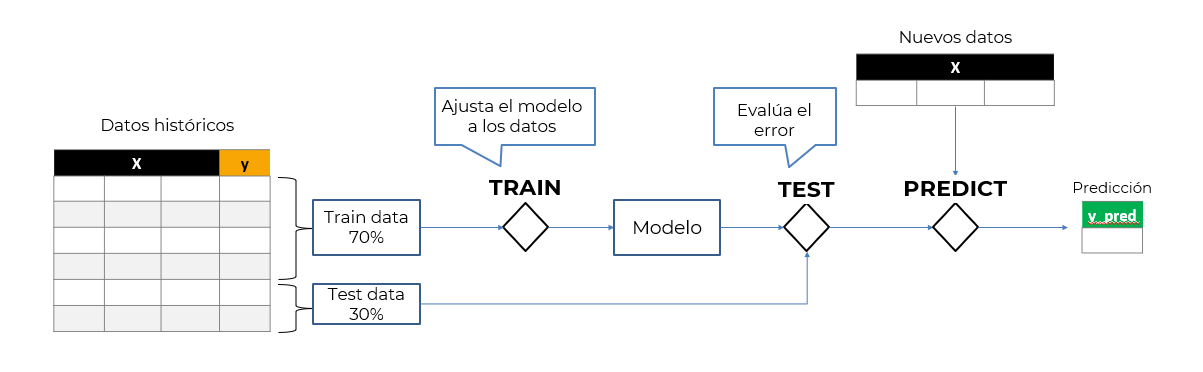

## Split X-y

In [35]:
target = 'lluvia_D+1'

In [36]:
# En clasificación, el target es booleano (True/False)
df[target] = df[target].astype('bool')

In [ ]:
# Cogemos todas las variables menos el target

In [37]:
features = [i for i in df.columns if i != target]

In [38]:
y = df[target]
X = df[features]

## Target: distribucion

In [39]:
y.value_counts()     # Distribucion

False    5308
True     1500
Name: lluvia_D+1, dtype: int64

In [40]:
y.value_counts() / df.shape[0]  # Distribucion en %

False    0.779671
True     0.220329
Name: lluvia_D+1, dtype: float64

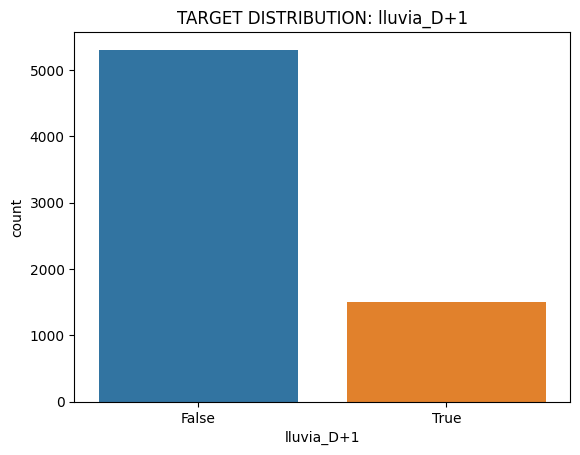

In [41]:
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

In [ ]:
# No está desbalanceado

## Split train-test

Para separar los datos entre TRAIN-TEST tenemos 2 opciones:
* **HOLDOUT**, utilizaremos ultimos dias para TEST. La más coherente si el objetivo del modelo es hacer predicciones a futuro.
* **RANDOM HOLDOUT**, utilizando un set random de observaciones para TEST. Cuando el componente temporal en la prediccion no es importante.

In [ ]:
# Cogemos datos aleatorios o los últimos datos, cuando hay un componente temporal lo mejor es testear con los últimos datos, porque tiende a ser más parecido.
# En un modelo pricing se puede hacer un random

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# HOLDOUT
X_train, X_test, y_train, y_test = train_test_split(
                                        X, 
                                        y, 
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        shuffle = False
                                        # stratify=y, solo si fuese random
                                    )

In [44]:
y_test

fecha
2010-05-28    False
2010-05-29    False
2010-05-30    False
2010-05-31    False
2010-06-01    False
              ...  
2015-12-26    False
2015-12-27     True
2015-12-28     True
2015-12-29    False
2015-12-30     True
Name: lluvia_D+1, Length: 2043, dtype: bool

In [45]:
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 4765
Test data instances: 2043


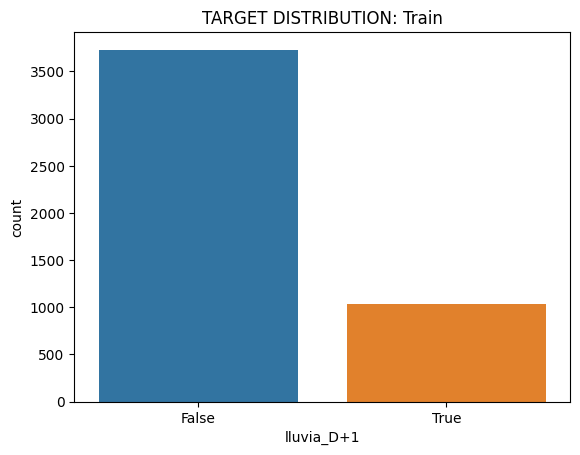

In [46]:
sns.countplot(x=y_train)
plt.title('TARGET DISTRIBUTION: Train')
plt.show()

In [47]:
y_train.value_counts() /len(y_train) #Distribucióne n X

False    0.783211
True     0.216789
Name: lluvia_D+1, dtype: float64

## Rescaling

¿Vamos a entrenar un modelo lineal o de distancias? -> NO. Por lo que no es necesario estandarizar los datos.

## TRAIN

Vamos a implementar el algoritmo Gradient Boosting Classifier (GBM) para entrenar un modelo de CLASIFICACIÓN, entrenando con los datos de TRAIN. Veremos más adelante como funcionan los distintos algoritmos ML. Utilizaremos algoritmos distribuidos a través de librerias de Python, principalmente scikit-learn.

In [ ]:
# Modelo de reglas, mejor no estandarizar

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Modelo de arbol de decisiones

In [49]:
model = GradientBoostingClassifier()  # declara el algoritmo del modelo ML -> Algoritmo ML + Datos = Modelo ML

In [50]:
model.fit(X_train, y_train)           # fit(): entrena el modelo ML con los datos de train

GradientBoostingClassifier()

In [51]:
model.predict(X_test)

array([False, False, False, ..., False, False, False])

In [ ]:
# El predict lo hacemos apartir de la x, es decir de las variables. Salen casi todas false porque tenemos un 20%solo

In [54]:
model.predict_proba(X_test)[:,1]

array([0.15365371, 0.06866585, 0.0378469 , ..., 0.16182493, 0.15695005,
       0.10620938])

In [55]:
model.predict_proba(X_test)

array([[0.84634629, 0.15365371],
       [0.93133415, 0.06866585],
       [0.9621531 , 0.0378469 ],
       ...,
       [0.83817507, 0.16182493],
       [0.84304995, 0.15695005],
       [0.89379062, 0.10620938]])

In [ ]:
# La probabilidad de éxito, en general salen todas bajas

In [ ]:
# Lo que nos interesa es predecir lo menos probable, en este caso lluvia, que llueva.

## TEST

#NIVEL

Para evaluar el performance del modelo comparamos el dato real (y) con la prediccion (y_pred), a la hora de evaluar mediremos el performance en TRAIN y TEST:
* El error en TEST es el error que estimamos se producirá en el PREDICT.
* La comparativa TRAIN vs TEST nos ayuda a identificar posible OVERFITTING en el ajuste.<br><br>
Las principales métricas de EVALUACIÓN en CLASIFICACIÓN son:
* **AUC y ROC Cruve**
* Confusion Matrix
* Accuracy, precision, recall, F1-score

In [56]:
y_train_pred = model.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [57]:
y_train_pred_proba = model.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = model.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

* AUC

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)      # AUC en TRAIN
auc_test = roc_auc_score(y_test, y_test_pred_proba)         # AUC en TEST

In [60]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.8676
AUC Test: 0.7906


* ROC Curve

In [61]:
from sklearn.metrics import roc_curve

In [62]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

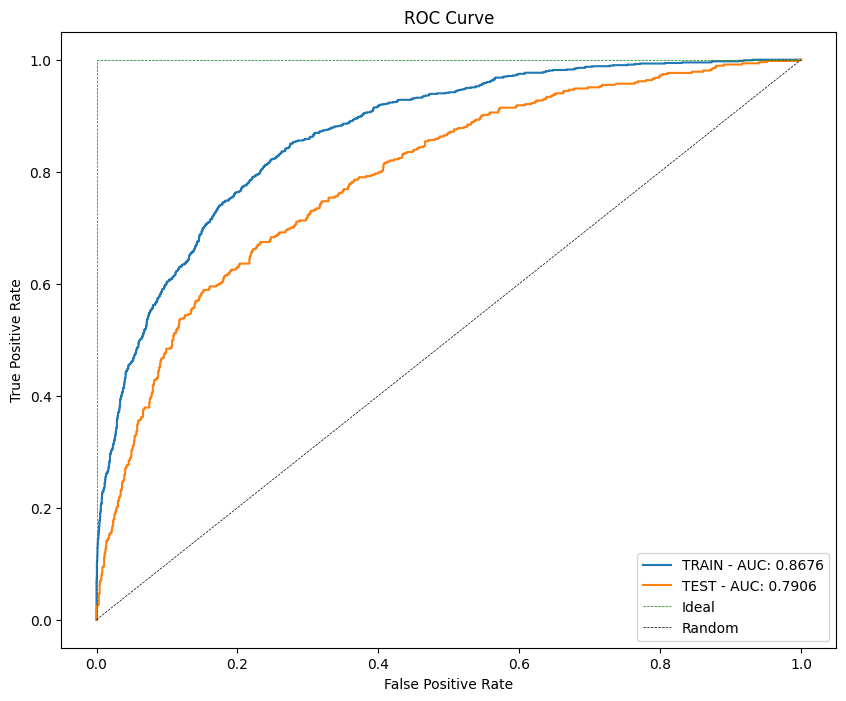

In [63]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

* Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [65]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

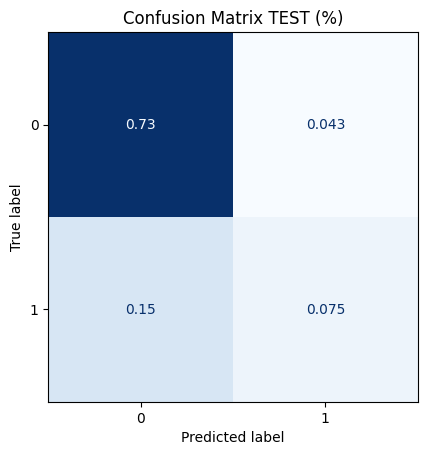

In [66]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

In [ ]:
73% de veces que no llueve, precisión. 7,5% de veces que llueve.

* Accuracy, Precision, Recall y F1-Score

In [67]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [68]:
# Rellenar
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [69]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.8037
Precision: 0.6375
Recall: 0.3276
F1-score: 0.4328


In [ ]:
#podríamos llegar a AUC más altos si el dataset tuviese más variables. Riqueza del dataset

O directamente de sklearn:

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.8037
Precision: 0.6375
Recall: 0.3276
F1-score: 0.4328


## Interpretabilidad

* Además de la evaluación del performance del modelo, es importante interpretar cual es la definición del modelo tras entrenarse. Es crucial entender cuales son las variables más determinantes en el modelo a la hora de realizar una predicción. 
* A la hora de interpretar un modelo utilizaremos:
  * **SHAP values** en modelos de ARBOLES DE DECISION
  * Coeficientes en modelos LINEALES

In [ ]:
#pip install shap

In [73]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.2 MB/s eta 0:00:00


In [74]:
import shap

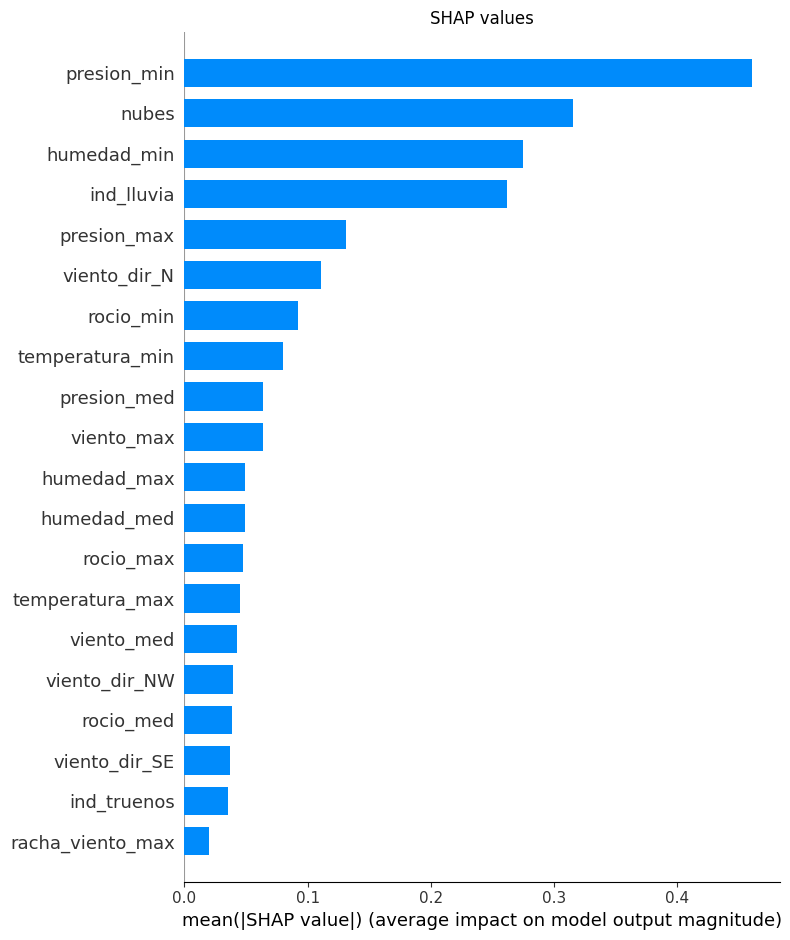

In [75]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

In [ ]:
# Impacto de cada variable en la predicción

Los SHAP values nos indican ademas el sentido del impacto que tiene la variable en la predicción (positivo/negativo):
* Rojo a la derecha = POSITIVO (+)
* Rojo a la izquierda = NEGATIVO (-)

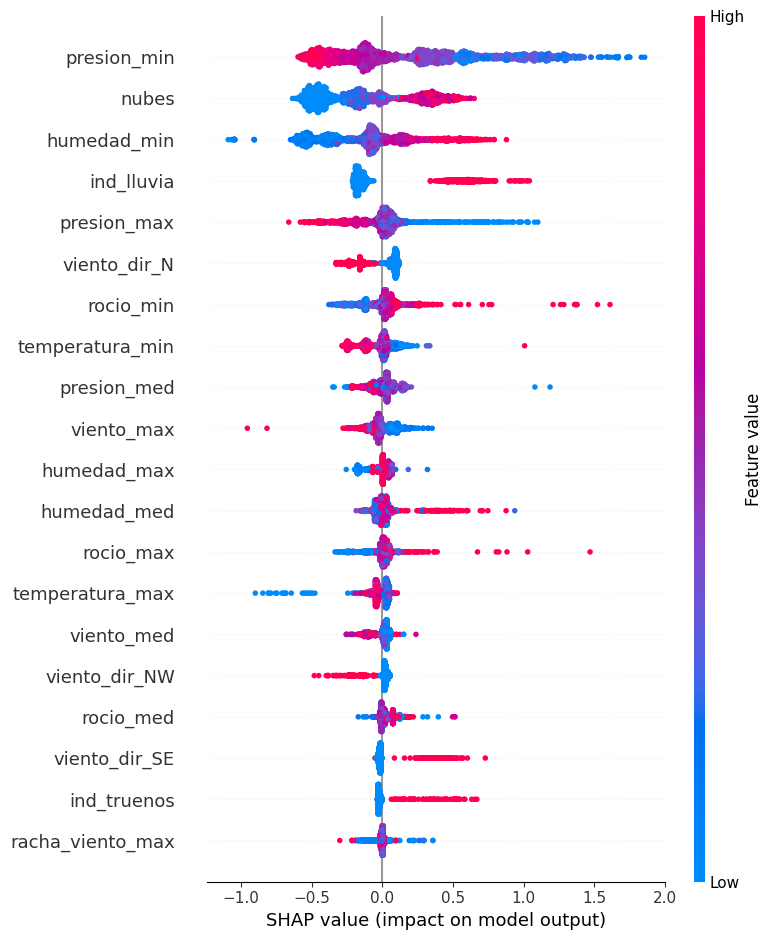

In [77]:
shap.summary_plot(shap_values, X_test)

## Guardar modelo

In [78]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/Master Data Science/05_Machine Learning_Supervisado/Notebooks/ML1 - Mi primer modelo.pkl', 'wb'))

# PREDICT

## Cargar nuevos datos

En la practica habria que aplicar de vuelta las mismas tecnicas de preprocessing aplicadas anteriormente para limpiar los nuevos datos. A modo didáctico, trabajaremos directamente con una muestra ya preprocesada para hacer el predict.

In [79]:
sample_predict = pd.read_csv('/content/drive/MyDrive/Master Data Science/05_Machine Learning_Supervisado/Notebooks/ML1 - Mi primer modelo/ML1-weather_predict.csv',index_col=0)
sample_predict.T

,2022-12-28
temperatura_max,15.00
temperatura_med,8.00
temperatura_min,2.00
rocio_max,8.00
rocio_med,4.00
rocio_min,1.00
humedad_max,100.00
humedad_med,78.00
humedad_min,34.00
presion_max,1031.00


## Cargar modelo

In [82]:
model = pickle.load(open('/content/drive/MyDrive/Master Data Science/05_Machine Learning_Supervisado/Notebooks/ML1 - Mi primer modelo/classifier.pkl', 'rb'))

In [86]:
# Check features matched features model
features_predict = list(sample_predict.columns)
model_features = list(model.feature_names_in_)

In [84]:
features_predict == model_features

True

## ¿Mañana llueve?

In [87]:
predict = model.predict(sample_predict)[0]

In [88]:
predict_proba = model.predict_proba(sample_predict)[:,1][0]

In [90]:
print('Mañana llueve:',predict)
print('Probabilidad de lluvia: {:.2%}'.format(predict_proba))

Mañana llueve: False
Probabilidad de lluvia: 16.18%
